## EXPLORING  DATA

### Letting homes and weather data speak for themselves!

 The underlining questions will serve as a guide to familiarize our selves better to the real estate market and weather trends in the city. 
    
    
#### * What do we know about the sales price of these homes?


#### * Is there a time of the year when people tend to buy more homes?


#### * How strong are homes'  features related to prices?


#### * Does weather throughout the year shows any similarities or patterns to the rest of findings?



So, let's dive right into this and start trying to find answers to these questions!

#### First, lets start by preparing the needed modules:

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

 # Setting prices to exclude decimal points
pd.set_option('precision', 2)                   

# disable new 'warn'
pd.options.mode.chained_assignment = None

# Setting DataFrame columns to show 500 columns/features
pd.set_option('display.max_columns', 500)        

#### HOUSING DATA

In [2]:
h_data = pd.read_csv('C:/Users/Alfredo/Desktop/github_content/price-prediction/C.-Datasets/housing_data.csv')
h_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
print(h_data.columns)
print("\n")
print("Number of homes' features:", len(h_data.columns))

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

Now let's try tackling these questions:

#### What do we know about the sales price of these homes?

SALE PRICES FOR HOUSES SOLD
Data Summary: 


count      1460.0
mean     180921.2
std       79442.5
min       34900.0
25%      129975.0
50%      163000.0
75%      214000.0
max      755000.0
Name: SalePrice, dtype: float64

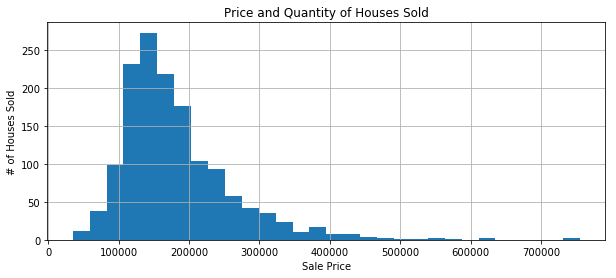

In [4]:
fig, ax = plt.subplots(figsize=(10,4))
h_data['SalePrice'].hist(bins=30)
ax.set_title('Price and Quantity of Houses Sold')
ax.set_ylabel('# of Houses Sold')
ax.set_xlabel("Sale Price")
print('SALE PRICES FOR HOUSES SOLD')
print('Data Summary: ')
h_data['SalePrice'].describe()

By first looking throuhg a general summary of the sales price of these homes, we see how we have

- A high quanity of the houses sold had a price between 170,000 and 190,000.

- Only a a couple houses were sold with an estimated price of 400,000 or more.

#### Is there a time of the year when people tend to buy more homes?


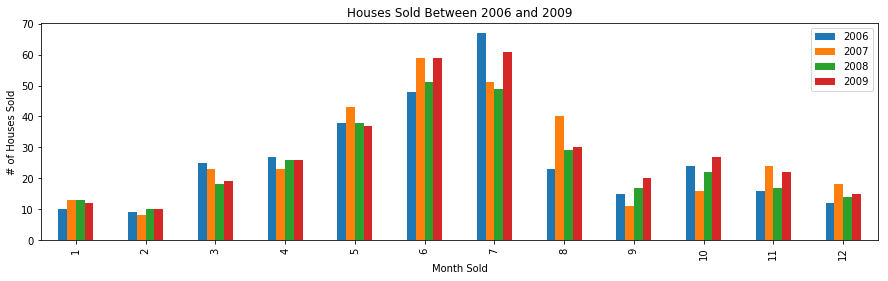

In [5]:
# NUMBER OF HOUSES SOLD EACH MONTH FOR THE YEAR 2006, 2007, 2008, 2009
h_data1 = h_data[h_data.YrSold == 2006].groupby('MoSold').size()
h_d2006 = h_data1.to_frame()

h_data1 = h_data[h_data.YrSold == 2007].groupby('MoSold').size()
h_d2007 = h_data1.to_frame()

h_data1 = h_data[h_data.YrSold == 2008].groupby('MoSold').size()
h_d2008 = h_data1.to_frame()

h_data1 = h_data[h_data.YrSold == 2009].groupby('MoSold').size()
h_d2009 = h_data1.to_frame()

all_hd = pd.concat([h_d2006, h_d2007, h_d2008, h_d2009], axis=1)
col = ['2006', '2007', '2008', '2009']
all_hd.columns = col
#all_hd.head()

ax = all_hd.plot(kind='bar', figsize=(15,4))
ax.set_title('Houses Sold Between 2006 and 2009')
ax.set_ylabel('# of Houses Sold')
ax.set_xlabel('Month Sold')

- We can clearly see how people are more likely to purchase homes during summer in the months May, June, and July.
- Also, people buy less houses during winter time in the months of November, December, January, and February.
- Summer's homes sales are more than double than winter:
 - Winter to Summer months have roughly a 150% increase in sales
 - $\frac{Summer(50) - Winter(20)}{Winter(20)}  x  100 = 150\% Increase$ 

####  How strong are homes'  features related to prices?

#### Bedrooms

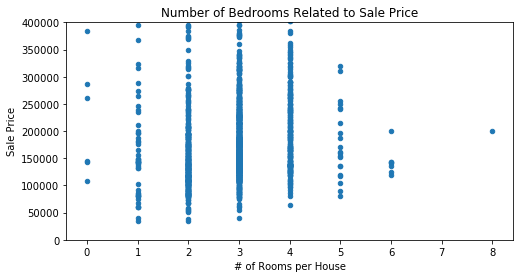

In [6]:
ax = h_data.plot(kind='scatter', x='BedroomAbvGr', y='SalePrice', figsize=(8,4), ylim=(0,400000));
ax.set_title('Number of Bedrooms Related to Sale Price')
ax.set_xlabel('# of Rooms per House')
ax.set_ylabel('Sale Price')

- 2-4 Bedrooms houses saw the biggest number of purchases in compare to others.
- Two homes show 0 bedrooms, could be consider as potential outliers or bad data.
- Houses with 1, 5, 6, or more rooms where the less purchased type of homes.

#### Bathrooms

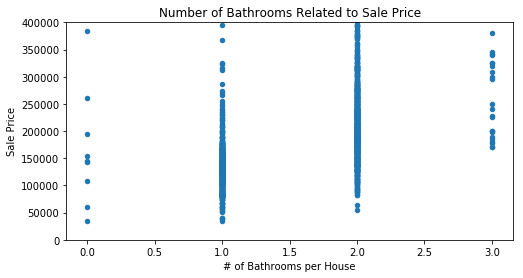

In [7]:
ax = h_data.plot(kind='scatter', x='FullBath', y='SalePrice', figsize=(8,4), ylim=(0,400000));
ax.set_title('Number of Bathrooms Related to Sale Price')
ax.set_xlabel('# of Bathrooms per House')
ax.set_ylabel('Sale Price')

- The majority of homes had between 1 and 2 bathrooms. 
- Some homes seems to show 0 values for bathrooms, could be consider as outliers or bad data.
- Only a few people purchased homes with 3 bathrooms.

#### Lot Area (Land)

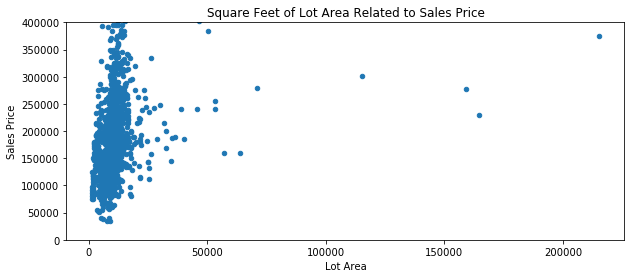

In [8]:
ax = h_data.plot(kind='scatter', x='LotArea', y='SalePrice', figsize=(10,4), ylim=(0,400000));
ax.set_title('Square Feet of Lot Area Related to Sales Price')
ax.set_xlabel('Lot Area')
ax.set_ylabel('Sales Price')

- Most houses sold had an estimated Lot Square Footage of less than 25,000 square feet.
- Only a couple houses had a Lot Square Footage of more than 30,000.

#### Living Area (House)

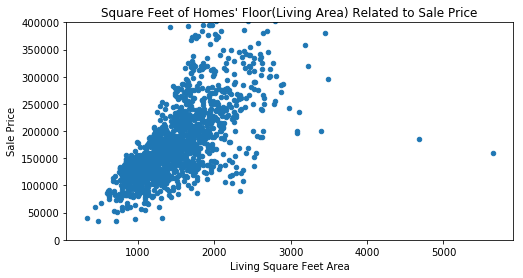

In [9]:
ax = h_data.plot(kind='scatter', x='GrLivArea', y='SalePrice', figsize=(8,4), ylim=(0,400000));
ax.set_title("Square Feet of Homes' Floor(Living Area) Related to Sale Price")
ax.set_xlabel('Living Square Feet Area')
ax.set_ylabel('Sale Price')

- There is a strong relationship between Living Square Feet Area and Sales Prices of homes.
- Only a couple houses had a Living Square Feet Area greater than 3,000.
- One property sold had a Living Square Feet Area greater than 5,000, could be a potential outlier.

----------------------------------------------

**Lets now take a look at the weather data:**

some fixtures neeed to be done before we can get to analyze the data better, so let's prepare the data beforehand.

In [10]:
# Open file
weather_d = pd.read_csv('C:/Users/Alfredo/Desktop/github_content/price-prediction/C.-Datasets/weather_data.csv')

# Sorting to data needed
weather_d1 = weather_d[weather_d.STATION_NAME == 'AMES 8 WSW IA US']                    
weather_d2 = weather_d1[(weather_d1.DATE >= 20060101) & (weather_d1.DATE <= 20091231)]
weather_d3 = weather_d2[['DATE', 'PRCP', 'SNOW', 'TMAX', 'TMIN']]

# Getting date to datetime,
# setting and sortinging index to ('Date')
weather_d3.loc[:, 'Date'] = pd.to_datetime(weather_d3.DATE, format='%Y%m%d')           
weather_d4 = weather_d3[['Date', 'PRCP', 'SNOW', 'TMAX', 'TMIN']]                       


# Building and setting index to year
# and month.
weather_d4['Date'] =weather_d4.Date.dt.to_period('M')                                   
weather_data = weather_d4.set_index('Date').sort_index()                                 


 # Changed corrupted values to Not a Number(NaN)
weather_data[weather_data == -9999] = np.nan                                   

 # Changed names for columns
col = ['Avg_Prcp', 'Avg_Snow', 'Avg_Tmax', 'Avg_Tmin']                         
weather_data.columns = col


 # Getting weather averages
wth_data_avg = weather_data.groupby(weather_data.index).mean()                

# Change index type to string object
# for later merging of dataframes
wth_data_avg.index = wth_data_avg.index.map(str).rename('Year_Month')  
wth_data_avg.head()

,Avg_Prcp,Avg_Snow,Avg_Tmax,Avg_Tmin
Year_Month,,,,
2006-01,0.02,0.06,41.42,25.84
2006-02,0.02,0.07,40.61,14.46
2006-03,0.09,0.24,47.26,27.90
2006-04,0.14,0.00,67.97,43.03
2006-05,0.07,0.00,74.48,51.23


In [11]:
# Output decimal(.00) instead of scientific value(0.0e+2)
pd.set_option('display.precision',2)
wth_data_avg.describe()

,Avg_Prcp,Avg_Snow,Avg_Tmax,Avg_Tmin
count,4.80e+01,48.00,48.00,48.00
mean,1.12e-01,0.10,59.22,39.05
std,8.50e-02,0.17,20.42,19.01
min,4.67e-03,0.00,23.21,4.84
25%,5.18e-02,0.00,42.49,25.68
50%,8.75e-02,0.00,60.05,38.45
75%,1.61e-01,0.11,78.93,55.70
max,3.56e-01,0.76,86.58,66.29


Now lets work through some of our questions

#### Does weather throughout the year, seems to have any relationship to any of our previous findings?

#### Precipitation

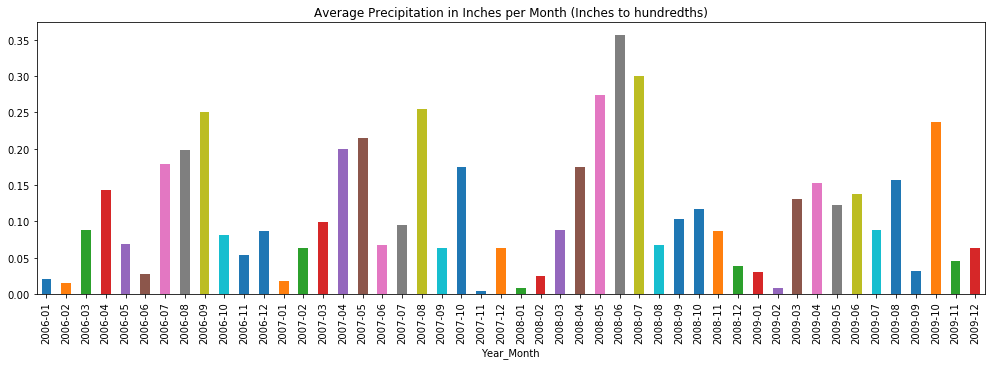

In [12]:
wth_data_avg['Avg_Prcp'].plot.bar(title='Average Precipitation in Inches per Month (Inches to hundredths)', figsize=(17,5));

- Winter months show less precipitation than the rest of the months.
- Spring and Summer months show the highest levels of precipitation through the year.

#### Snow

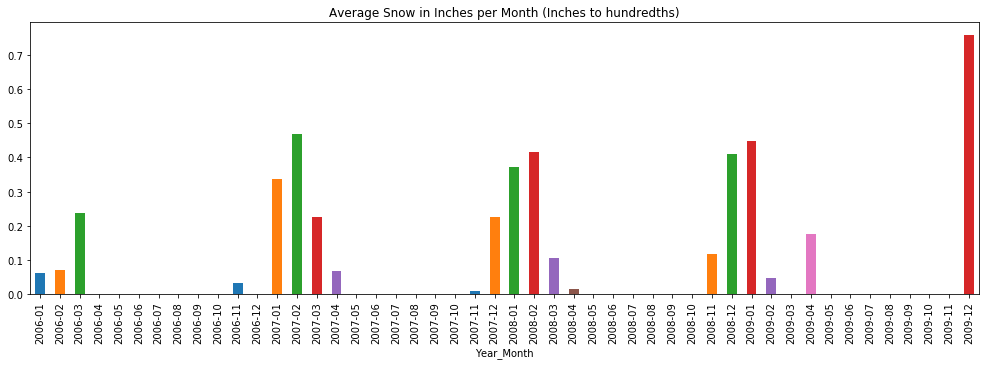

In [13]:
wth_data_avg['Avg_Snow'].plot.bar(title='Average Snow in Inches per Month (Inches to hundredths)', figsize=(17,5));

- Snow shows always present during winter months.
- Months May through October show no presence of snow at all.

#### Temperatures

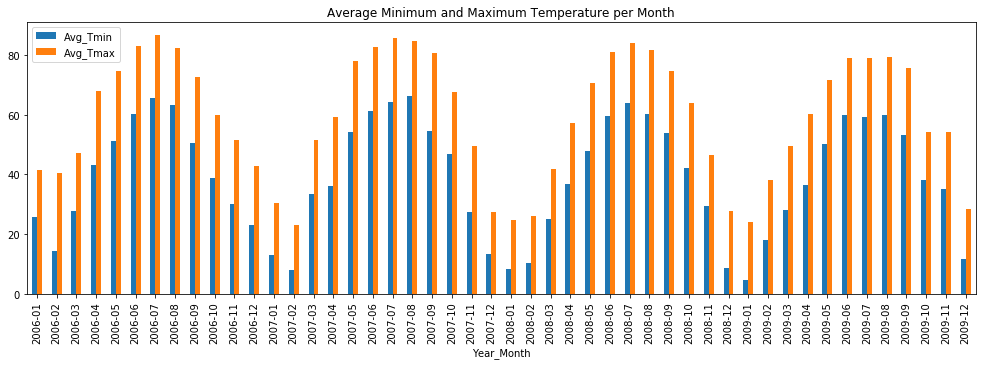

In [14]:
wth_data_avg[['Avg_Tmin', 'Avg_Tmax']].plot.bar(title='Average Minimum and Maximum Temperature per Month', figsize=(17,5));

- May through October had the highest temperatures, while December through February had the lowest temperatures. 

----------------------------------------------------

###  Conclusion:

We now have a stronger sense for the real estate market and weather in this area.

These findings gave insights on what a person should expect to pay for the houses in the area. Also, people tend to buy more homes during summer when there is no snow and temperature are higher, probably turning into a seller's market from the increase in homes' demand, and switching to a more difficult negotiation to the buyer in home prices. Lastly, certain homes' features such as the inside space leaving area seems to have a substantial impact in determining the price of these homes.